In [1]:
from langdetect import detect
from tqdm import tqdm_notebook
import pandas as pd
tqdm_notebook().pandas()

C:\Users\serva\AppData\Local\Temp\ipykernel_12272\3194524958.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

## Filtering english text only

In [2]:
data=pd.read_csv("C:\\Users\\serva\\Downloads\\data_all.csv")

In [3]:
data.head(5)
len(data)

6042

In [4]:
data['lang'] = data.Text.progress_map(detect)

  0%|          | 0/6042 [00:00<?, ?it/s]

In [5]:
data.lang.value_counts()

en    5594
fr     377
cy      15
pt      15
ca      13
vi       4
cs       4
tr       4
so       3
hu       2
sw       2
sk       2
pl       2
id       1
da       1
tl       1
sq       1
it       1
Name: lang, dtype: int64

In [6]:
data = data.loc[data.lang=='en']

In [7]:
"""# Rename the columns 
data=df.rename(columns = {'content':'Text'})
data=data.drop(columns=["score","embedding","content_type","id","meta"])

data1.head(5)"""

'# Rename the columns \ndata=df.rename(columns = {\'content\':\'Text\'})\ndata=data.drop(columns=["score","embedding","content_type","id","meta"])\n\ndata1.head(5)'

In [8]:
data.columns = map(str.lower, data.columns)

data.head(6)

,text,content_type,id,meta,score,embedding,country,lang
0,published by the general secretariat of the na...,text,bb78913931f4b8b74e575aeb5406cc35,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en
1,together we agreed to limit global warming to ...,text,d8c48640827f4d174cf80311d1f11bef,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en
2,developed through extensive consultations over...,text,245855946064094809347a6fc7691e3d,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en
3,in other sectors we have increased our level o...,text,6f84aa72b838f93f0582a5eb2e8f7495,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en
4,i would like to take this opportunity to thank...,text,d56aef69677cf3671e654978b62b9ad1,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en
5,this cooperation and support will be crucial t...,text,caf7184abbd4c6e4c668afcd67d863b4,"{'name': '20201231_NDC_Update_Cambodia.docx', ...",NaN,NaN,20201231_NDC_Update_Cambodia.docx,en


In [9]:
#data.to_csv(r'C:\\Users\\serva\\Downloads\\data_all.csv', index = True)

In [10]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [11]:

documents=data["text"]

documents.head(10)



0    published by the general secretariat of the na...
1    together we agreed to limit global warming to ...
2    developed through extensive consultations over...
3    in other sectors we have increased our level o...
4    i would like to take this opportunity to thank...
5    this cooperation and support will be crucial t...
6    say samal minister of environment chair of the...
7    together we agreed to limit global warming to ...
8    the country is now proud to submit an updated ...
9    the country has already made remarkable progre...
Name: text, dtype: object

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

costumized_stopwords=["united kingdom","argentina","australia","bahamas","belgium","brazil","canada","china","colombia","cuba","dominican republic","ecuador","el salvador","france","germany","guatemala","haiti","honduras","india","ireland","israel","italy","japan","korea","mexico","netherlands","philippines","spain","sweden","switzerland","taiwan","venezuela","viet nam","afghanistan","albania","algeria","american samoa","andorra","angola","armenia","austria","azerbaijan","bahrain","bangladesh","barbados","belarus","belize","benin","bermuda","bhutan","bolivia","bosnia and herzegovina","botswana","bulgaria","burkina faso","burundi","cambodia","cameroon","cape verde islands","chad","chile","congo","costa rica","croatia","cyprus","czech republic","denmark","djibouti","dominica","egypt","eritrea","estonia","ethiopia","fiji","finland","french polynesia","gabon","gambia","georgia","ghana","greece","grenada","guinea","guyana","hungary","iceland","indonesia","iran","iraq","jamaica","jordan","kazakhstan","kenya","korea","kuwait","latvia","lebanon","liberia","libya","lithuania","luxembourg","madagascar","malawi","malaysia","maldives","mali","malta","mauritania","mauritius","monaco","mongolia","montenegro","morocco","mozambique","namibia","nepal","new zealand","nicaragua","niger","nigeria","norway","oman","pakistan","panama","papua new guinea","paraguay","peru","poland","portugal","qatar","romania","rwanda","saudi arabia","senegal","serbia","sierra leone","singapore","slovakia","slovenia","solomon islands","somalia","south africa","sri lanka","sudan","suriname","swaziland","tajikistan","thailand","togo","trinidad and tobago","tunisia","turkey","turkmenistan","tuvalu","uganda","ukraine","united arab emirates","united states","uruguay","uzbekistan","vanuatu","yemen","zambia"
]

""""stpwrd = gensim.parsing.preprocessing.STOPWORDS and costumized_stopwords """


stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(costumized_stopwords)



def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))



def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stpwrd and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [14]:

processed_docs = data['text'].map(preprocess)



In [15]:
processed_docs.head(5)

0    [publish, general, secretariat, nation, counci...
1    [togeth, agre, limit, global, warm, well, pref...
2    [develop, extens, consult, ninemonth, period, ...
3    [sector, increas, level, ambit, green, hous, g...
4    [would, like, take, opportun, thank, partner, ...
Name: text, dtype: object

In [16]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt 
import pandas as pd

# Bigrams and Trigrams


In [17]:

data_words=processed_docs
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['publish', 'general', 'secretariat', 'nation', 'council', 'sustain', 'environ', 'kingdom', 'general', 'secretariat', 'nation', 'council', 'sustain', 'environ', 'kingdom', 'right', 'reserv', 'part', 'public', 'reproduc', 'transmit', 'form', 'mean', 'without', 'permiss', 'copyright', 'holder', 'contact', 'inform', 'general', 'secretariat', 'nation', 'council', 'sustain', 'environ', 'morodok', 'techo', 'build', 'tonl', 'bassac', 'chamkarmon', 'phnom_penh', 'updat', 'nation', 'determin', 'contribut', 'foreword', 'intern', 'communiti', 'reach', 'truli', 'histor', 'mileston', 'pari', 'climat', 'agreement']


In [18]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [19]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)



In [20]:
# Create Dictionary 
id2word = corpora.Dictionary(data_words )  
id2word.filter_extremes(no_below=10, no_above=0.2)
# Create Corpus 
texts = data_words 
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 3), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 3), (24, 1), (25, 1)]]


In [21]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('agreement', 1),
  ('build', 1),
  ('communiti', 1),
  ('council', 3),
  ('determin', 1),
  ('environ', 3),
  ('foreword', 1),
  ('form', 1),
  ('general', 3),
  ('histor', 1),
  ('inform', 1),
  ('intern', 1),
  ('kingdom', 2),
  ('mean', 1),
  ('mileston', 1),
  ('pari', 1),
  ('part', 1),
  ('public', 1),
  ('publish', 1),
  ('reach', 1),
  ('reserv', 1),
  ('right', 1),
  ('secretariat', 3),
  ('sustain', 3),
  ('updat', 1),
  ('without', 1)]]

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(
corpus=corpus, # Der corpus mit BoW oder TF-IDF
id2word=id2word, # id2word gibt das Dictionary aus den Wörtern wieder
num_topics=10, # Die mitgegebene Topic Anzahl
random_state=100, # Das spezifische Seed, damit der Prozess wieder gleich wiedergegeben werden kann
update_every=1,# Gibt an wie oft das Modell geupdatet werden soll
chunksize=100, # Die Anzahl an Dokumenten die auf einmal angeschaut wird
passes=10,# Wie oft der Algorithmus durchlaufen wird
alpha='auto', # Das vorgegebene Gewicht Alpha
per_word_topics=True)

In [23]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.130*"agricultur" + 0.066*"water" + 0.046*"manag" + 0.031*"product" + '
  '0.030*"land" + 0.022*"practic" + 0.018*"soil" + 0.016*"crop" + 0.016*"farm" '
  '+ 0.015*"transfer"'),
 (1,
  '0.093*"project" + 0.057*"invest" + 0.053*"financ" + 0.044*"fund" + '
  '0.043*"intern" + 0.043*"requir" + 0.033*"cost" + 0.028*"financi" + '
  '0.027*"need" + 0.023*"option"'),
 (2,
  '0.021*"area" + 0.021*"impact" + 0.021*"south" + 0.018*"africa" + '
  '0.018*"econom" + 0.017*"seychell" + 0.017*"coastal" + 0.016*"protect" + '
  '0.014*"popul" + 0.014*"natur"'),
 (3,
  '0.039*"polici" + 0.033*"strategi" + 0.032*"sustain" + 0.032*"govern" + '
  '0.020*"framework" + 0.019*"commonwealth" + 0.017*"process" + '
  '0.017*"establish" + 0.016*"environ" + 0.014*"institut"'),
 (4,
  '0.140*"forest" + 0.068*"land" + 0.058*"total" + 0.039*"million" + '
  '0.031*"forestri" + 0.031*"annual" + 0.030*"cover" + 0.029*"estim" + '
  '0.022*"period" + 0.021*"approxim"'),
 (5,
  '0.053*"resili" + 0.040*"capac" + 0.

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.066028 -0.149894       1        1  20.887818
2     -0.178057  0.009723       2        1  16.129893
3     -0.250240  0.053186       3        1  15.182372
8     -0.032688 -0.071907       4        1  11.939705
5     -0.220199  0.081426       5        1  11.744709
1      0.046255 -0.115468       6        1   6.616598
0      0.117242  0.311517       7        1   5.822416
4      0.201378 -0.106875       8        1   4.523551
9      0.161069 -0.226805       9        1   3.609784
7      0.221269  0.215097      10        1   3.543154, topic_info=            Term         Freq        Total Category  logprob  loglift
71    agricultur  1995.000000  1995.000000  Default  30.0000  30.0000
212       forest  1669.000000  1669.000000  Default  29.0000  29.0000
577      project  1822.000000  1822.000000  Default  28.0000  28.0000
55        resili  1651.000000  1651.000000  Default  27.0000  27.0000
103       target  1610.000000  1610.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
236         mine    77.643909    78.531231  Topic10  -4.7874   3.3288
2209    kalinago   133.542584   135.079214  Topic10  -4.2451   3.3287
252      product   589.947476  1060.971982  Topic10  -2.7595   2.7532
517        sourc   136.829294   631.616603  Topic10  -4.2208   1.8106
185    construct   107.606617   221.265851  Topic10  -4.4611   2.6193

[487 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
378       5  0.993391       abil
346       9  0.976153    absolut
1181      5  0.986585  accompani
781       1  0.924944    account
781       8  0.073790    account
...     ...       ...        ...
159       2  0.979651      world
159       7  0.016988      world
377       1  0.865583       year
377       2  0.134019       year
288       5  0.992654      youth

[638 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 9, 6, 2, 1, 5, 10, 8])

In [25]:
# Save the visualization in a html file
p = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(p, 'lda_visualization.html')

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [27]:
from wordcloud import WordCloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

lda=lda_model




""""wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
# generate word cloud
wc.generate_from_frequencies(WordCloud().fit_words(dict(lda.show_topic(t, 200))
                                                   
for t in range(10):
    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    wc.generate_from_frequencies(WordCloud().fit_words(dict(lda.show_topic(t, 200))
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.title("Topic " + str(t))
    
wc.generate(text)
for t in range(10):
    plt.imshow(wc, interpolation='bilinear')
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic " + str(t))
    plt.show() """

'"wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)\n# generate word cloud\nwc.generate_from_frequencies(WordCloud().fit_words(dict(lda.show_topic(t, 200))\n                                                   \nfor t in range(10):\n    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)\n    wc.generate_from_frequencies(WordCloud().fit_words(dict(lda.show_topic(t, 200))\n    # show\n    plt.imshow(wc, interpolation="bilinear")\n    plt.axis("off")\n    plt.show()\n    plt.title("Topic " + str(t))\n    \nwc.generate(text)\nfor t in range(10):\n    plt.imshow(wc, interpolation=\'bilinear\')\n    plt.figure()\n    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))\n    plt.axis("off")\n    plt.title("Topic " + str(t))\n    plt.show() '

In [28]:
# Creating Wordclouds for every Topic 

"""wc.generate(text)
for t in range(10):
    plt.figure()
    plt.imshow(WordCloud(max_font_size=100, max_words=100, background_color="white").fit_words(dict(lda.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic " + str(t))
    plt.show()
    WordCloud(max_font_size=100, max_words=100, background_color="white").fit_words(dict(lda.show_topic(t, 200))).to_file("first_review.png")"""


'wc.generate(text)\nfor t in range(10):\n    plt.figure()\n    plt.imshow(WordCloud(max_font_size=100, max_words=100, background_color="white").fit_words(dict(lda.show_topic(t, 200))))\n    plt.axis("off")\n    plt.title("Topic " + str(t))\n    plt.show()\n    WordCloud(max_font_size=100, max_words=100, background_color="white").fit_words(dict(lda.show_topic(t, 200))).to_file("first_review.png")'

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, f

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength inste

C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\serva\Downloads\Anaconda\envs\py39\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Tr

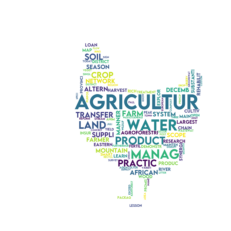

In [29]:

import os

# Change the current working directory
os.chdir('C:\\Users\\serva\\Downloads')
#Adding image
chicken_mask = np.array(Image.open("chicken.jpg"))
tree_mask = np.array(Image.open("Euro.png"))
#Path for the writing style
font_path = 'font.otf'

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(
max_font_size=200, max_words=100, background_color="white",font_path=font_path,mask=chicken_mask).fit_words(dict(lda.show_topic(0, 150)))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("Chicken_pic.png")

# Coherence Score

In [30]:
data_lemmatized=data_words
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.864732993600276

Coherence Score:  0.3849711921896663
